# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [18]:
import pandas as pd
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

In [19]:
# типы данных мы увидели выше
# Income - значение дохода, можем заметить, что у всех доход представлен в долларах, следовательно мы можем хранить эти данные как float
# Dt_Customer - дата, которая представлена в виде строки
df.head()

ID  Year_Birth   Education Marital_Status       Income  Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [20]:
# как преобразовать колонку в строковый тип, чтобы удалить символы $ и ,
# https://stackoverflow.com/questions/55557004/getting-attributeerror-float-object-has-no-attribute-replace-error-while
df["Income"] = df["Income"].str.replace('$','')
df["Income"] = df["Income"].str.replace(',','')
df["Income"] = df["Income"].astype(float)

<ipython-input-20-52188d03fd1a>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Income"] = df["Income"].str.replace('$','')


Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [21]:
# как конвертировать строку если дано всего две цифры https://stackoverflow.com/questions/16600548/how-to-parse-string-dates-with-2-digit-year
import datetime

df['Dt_Customer'].apply(lambda date: datetime.datetime.strptime(date,'%m/%d/%y').strftime('%Y-%m-%d'))

0       2014-06-16
1       2014-06-15
2       2014-05-13
3       2014-05-11
4       2014-04-08
           ...    
2235    2013-03-07
2236    2013-01-22
2237    2012-12-03
2238    2012-11-29
2239    2012-09-01
Name: Dt_Customer, Length: 2240, dtype: object

## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [22]:
# как посчитать количество пропусков: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

# пропуски только в колонке Income, всего их - 24
# если Income значение стоит как na, то поставим значение 0, чтобы обозначить отсутсвие
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [23]:
df['Income'] = df['Income'].fillna(0)

In [24]:
df.isna().any().any()

False

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   51687.459375     0.444196     0.506250   
std     3246.662198    11.984069   25609.342730     0.538398     0.544538   
min        0.000000  1893.000000       0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   34722.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51075.000000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000  ...          2240.000000        2240.000000   
mean         37.525446  ...             2.662054           5.790179   
std          54.628979  ...             2.923101           3.250958   
min           0.000000  ...             0.000000           0.000000   
25%           3.000000  ...             0.000000           3.000000   
50%          12.000000  ...             2.000000           5.000000   
75%          50.000000  ...             4.000000           8.000000   
max         259.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107     0.009375  
std        0.245316      0.114976     0.356274     0.096391  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 24 columns]

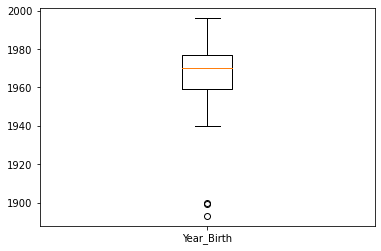

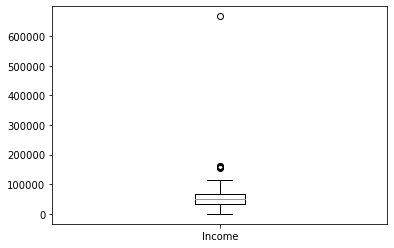

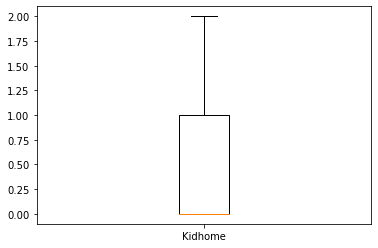

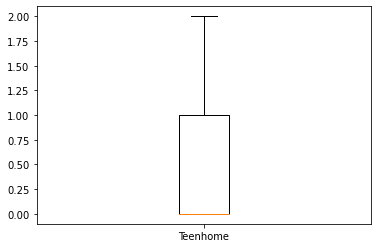

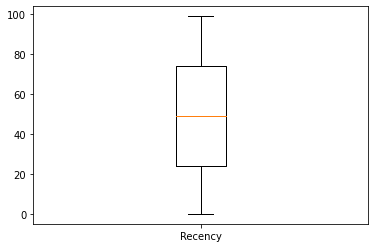

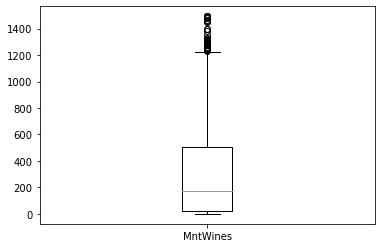

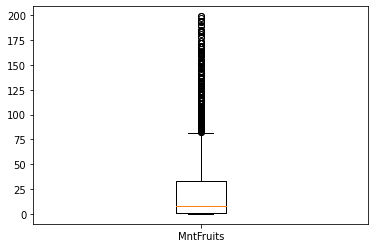

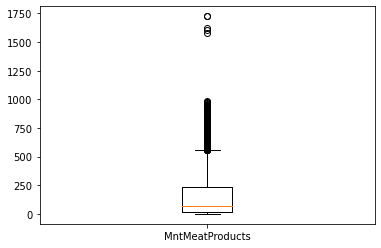

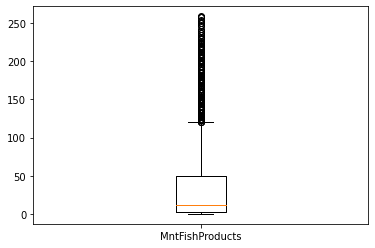

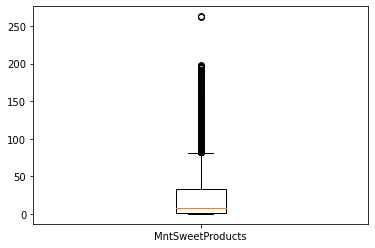

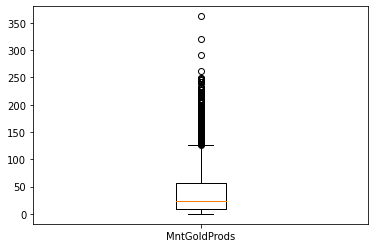

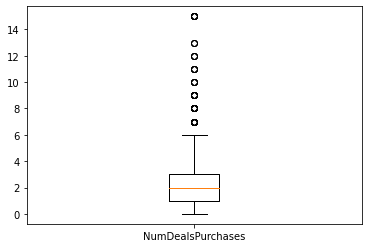

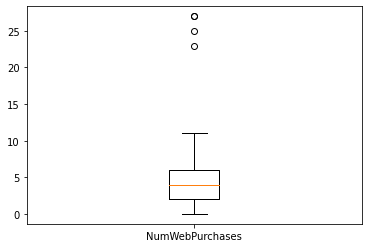

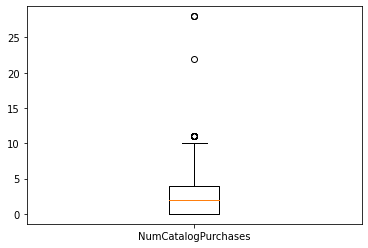

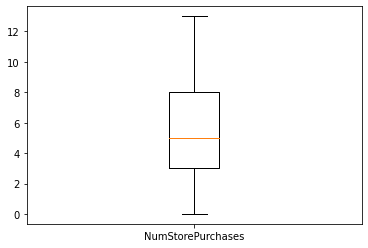

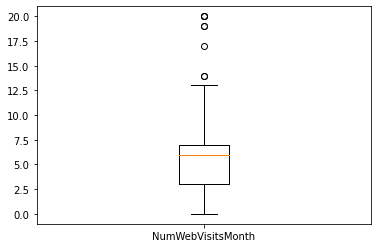

In [25]:
# давайте посмотрим на boxplot для каждого численного стобца
# как найти выбросы: https://pythobyte.com/detection-removal-outliers-in-python-adaa857e/
# ищем выбросы путем нахождения слишком больших отклонений
# как создать boxplot, конечно, мы не создаем множетсво разнообразных на одном графике, но все же https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary

import numpy as np
import matplotlib.pyplot as plt
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('ID')
for column in numeric_columns:
    if len(df[column].unique()) != 2: # если переменная бинарна, то учитывать её не будем
        fig, ax = plt.subplots()
        ax.boxplot(df[column].values.tolist())
        ax.set_xticklabels([column])

df.describe()

In [26]:
# как мы можем заметить выбросы есть в Income, NumCatalogPurchases, NumWebVisitsMonth, NumWebPurchases, NumDealsPurchases и во всех колонках Mnt, выбросы в дате рождения проигнорируем
# в признаках, где есть выбросы среднее значение сильно отличается от максимального / минимального
# выбросы мешают оценивать картину в целом и не ползволяют граммотно оценивать всю выборку

outlines_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 'NumCatalogPurchases', 'NumWebPurchases',
                    'NumDealsPurchases', 'Income']

for x in outlines_columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [27]:
df = df.dropna()

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

In [28]:
# добавим признак среднего чека из представлленых категорий. Полезен, чтобы определить насколько большие / дорогие заказы человек делает
# вторым признаком будет средний доход на семью, так как поможет отразить реальное финансовое положение

def calculate_avg_income(data):
    number_of_people = data['Teenhome'] + data['Kidhome'] + (data['Marital_Status'] == 'Together' or data['Marital_Status'] == 'Married') + 1
    return data['Income'] / number_of_people

df['AvgIncome'] = df.apply(lambda data: calculate_avg_income(data), axis=1)

In [35]:
def calculate_avg_num_of_products(data):
    amount = data['MntFishProducts'] + data['MntMeatProducts'] + data['MntFruits'] + data['MntSweetProducts'] + data['MntWines'] + data['MntGoldProds']
    number_of_orders = data['NumStorePurchases'] + data['NumWebPurchases']
    return amount / number_of_orders

df['AvgProducts'] = df.apply(lambda data: calculate_avg_num_of_products(data), axis=1)

## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [39]:
for column in df.select_dtypes(include=['object']):
    print(df[column].value_counts())

Graduation    724
PhD           356
Master        268
2n Cycle      136
Basic          52
Name: Education, dtype: int64
Married     598
Together    401
Single      328
Divorced    156
Widow        48
Alone         3
YOLO          2
Name: Marital_Status, dtype: int64
3/23/14     9
8/20/13     9
11/3/12     8
5/22/14     8
11/7/13     7
           ..
6/11/14     1
8/11/12     1
5/5/14      1
10/30/12    1
1/22/13     1
Name: Dt_Customer, Length: 611, dtype: int64
SP     764
SA     219
CA     172
AUS    111
IND    111
GER     85
US      72
ME       2
Name: Country, dtype: int64


Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [40]:
df.describe()

ID   Year_Birth        Income      Kidhome     Teenhome  \
count   1536.000000  1536.000000   1536.000000  1536.000000  1536.000000   
mean    5604.812500  1969.294922  42999.679036     0.570964     0.558594   
std     3261.185254    11.620307  17700.108824     0.544002     0.544278   
min        1.000000  1893.000000      0.000000     0.000000     0.000000   
25%     2813.250000  1960.000000  30337.750000     0.000000     0.000000   
50%     5522.000000  1971.000000  41925.000000     1.000000     1.000000   
75%     8418.500000  1977.000000  55598.250000     1.000000     1.000000   
max    11191.000000  1996.000000  90933.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  1536.000000  1536.000000  1536.000000      1536.000000   
mean     49.075521   189.019531    10.393880        70.291016   
std      29.093685   266.415359    15.737395       100.862008   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    13.000000     1.000000        11.000000   
50%      49.000000    53.000000     4.000000        26.000000   
75%      75.000000   254.000000    12.000000        84.250000   
max      99.000000  1218.000000    81.000000       545.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      1536.000000  ...        1536.000000   1536.000000   1536.000000   
mean         15.162760  ...           5.923828      0.066406      0.063151   
std          23.300799  ...           1.961202      0.249072      0.243314   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           2.000000  ...           5.000000      0.000000      0.000000   
50%           6.000000  ...           6.000000      0.000000      0.000000   
75%          17.000000  ...           7.000000      0.000000      0.000000   
max         120.000000  ...          13.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Response     Complain  \
count   1536.000000   1536.000000   1536.000000  1536.000000  1536.000000   
mean       0.023438      0.023438      0.008464     0.103516     0.010417   
std        0.151338      0.151338      0.091637     0.304730     0.101562   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

          AvgIncome  AvgProducts  
count   1536.000000  1536.000000  
mean   17709.652843    29.501286  
std    12414.467207    26.827901  
min        0.000000     2.666667  
25%    10265.000000    10.800000  
50%    14611.500000    22.342857  
75%    21337.625000    37.254596  
max    90933.000000   229.333333  

[8 rows x 26 columns]

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

In [75]:
# выберем три признака - доход, кол-во онлайн покупок, затраченная сумма на вино

df.groupby(['Marital_Status', 'Country', 'Education'])[['Income', 'NumWebPurchases', 'MntWines']].describe()

# можно заметить, что в америке люди со степенью phd получают больше, чем со всеми другими. Однако про все страны этого сказать нельзя. Это может быть связано
# с тем, что люди, получившую высшую степень, идут работать в науку, где в среднем зарплаты могут быть ниже, чем по рынку. Однако, общая тенденция говорит о том, что уровень образования
# сильно связан с доходом

# аналогично, можно заметить, что одинокие / разведенные люди с образованием graduation заказывают куда больше алкоголя ( на большие суммы ) и в менее развитых и богатых странах
# средний чек, естественно, ниже
# аналогично, можно заметить, что люди обладающие лучшим образованием делают в среднем больше заказов онлайн, что можно объяснить лучшим заработком и ценностью времени

Income                                       \
                                   count          mean           std      min   
Marital_Status Country Education                                                
Alone          CA      Graduation    1.0  34176.000000           NaN  34176.0   
                       Master        1.0  61331.000000           NaN  61331.0   
                       PhD           1.0  35860.000000           NaN  35860.0   
Divorced       AUS     Graduation    5.0  52869.400000  24685.962839  26759.0   
                       Master        2.0  26157.000000  21464.933450  10979.0   
...                                  ...           ...           ...      ...   
Widow          SP      PhD          12.0  56547.666667  13802.274426  33438.0   
               US      Graduation    1.0  76320.000000           NaN  76320.0   
                       Master        1.0  47570.000000           NaN  47570.0   
YOLO           CA      PhD           1.0  48432.000000           NaN  48432.0   
               IND     PhD           1.0  48432.000000           NaN  48432.0   

                                                                        \
                                        25%      50%      75%      max   
Marital_Status Country Education                                         
Alone          CA      Graduation  34176.00  34176.0  34176.0  34176.0   
                       Master      61331.00  61331.0  61331.0  61331.0   
                       PhD         35860.00  35860.0  35860.0  35860.0   
Divorced       AUS     Graduation  39996.00  43185.0  64713.0  89694.0   
                       Master      18568.00  26157.0  33746.0  41335.0   
...                                     ...      ...      ...      ...   
Widow          SP      PhD         51306.75  55453.5  63669.5  78028.0   
               US      Graduation  76320.00  76320.0  76320.0  76320.0   
                       Master      47570.00  47570.0  47570.0  47570.0   
YOLO           CA      PhD         48432.00  48432.0  48432.0  48432.0   
               IND     PhD         48432.00  48432.0  48432.0  48432.0   

                                  NumWebPurchases             ...         \
                                            count       mean  ...    75%   
Marital_Status Country Education                              ...          
Alone          CA      Graduation             1.0   3.000000  ...   3.00   
                       Master                 1.0  11.000000  ...  11.00   
                       PhD                    1.0   1.000000  ...   1.00   
Divorced       AUS     Graduation             5.0   4.200000  ...   5.00   
                       Master                 2.0   3.500000  ...   3.75   
...                                           ...        ...  ...    ...   
Widow          SP      PhD                   12.0   5.416667  ...   7.50   
               US      Graduation             1.0   6.000000  ...   6.00   
                       Master                 1.0   2.000000  ...   2.00   
YOLO           CA      PhD                    1.0   7.000000  ...   7.00   
               IND     PhD                    1.0   7.000000  ...   7.00   

                                        MntWines                          \
                                    max    count        mean         std   
Marital_Status Country Education                                           
Alone          CA      Graduation   3.0      1.0    5.000000         NaN   
                       Master      11.0      1.0  534.000000         NaN   
                       PhD          1.0      1.0   15.000000         NaN   
Divorced       AUS     Graduation   9.0      5.0  375.800000  469.910311   
                       Master       4.0      2.0   60.000000   73.539105   
...                                 ...      ...         ...         ...   
Widow          SP      PhD         11.0     12.0  354.416667  271.250122   
               US      Graduation   6

## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [63]:
# чтобы отобрать только нужные нам пары: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

corr_matrix = df.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
       .stack()
       .sort_values(ascending=False))

sol = sol[:3]
for index, value in sol.items():
    print(index, value)

# мы добавили вычислимые признаки, потому наибольшая корреляция с ними, посмотрим на топ 3 без них:

corr_matrix = df.drop(columns=['AvgProducts', 'AvgIncome']).corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
       .stack()
       .sort_values(ascending=False))

sol = sol[:3]
for index, value in sol.items():
    print(index, value)

# зачастую люди покупают алкоголь именно в магазине и в большинстве стран недоступна доставка данного типа товаров, потому, как можем заметить
# именно эти два признака коррелируют. Мясо, ровно как и алкоголь - достаточно дорогие товары, потому покупка по каталогу делает их более привлекательными

('MntWines', 'AvgProducts') 0.8537060775895916
('MntMeatProducts', 'AvgProducts') 0.802523382415525
('NumCatalogPurchases', 'AvgProducts') 0.7763923961405291
('MntWines', 'NumStorePurchases') 0.7659073806348401
('MntMeatProducts', 'NumCatalogPurchases') 0.7459769222956799
('MntWines', 'NumCatalogPurchases') 0.7455039961501241


## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

<AxesSubplot:title={'center':'Mean wine consumption'}, xlabel='Marital status', ylabel='Average cost of wine'>

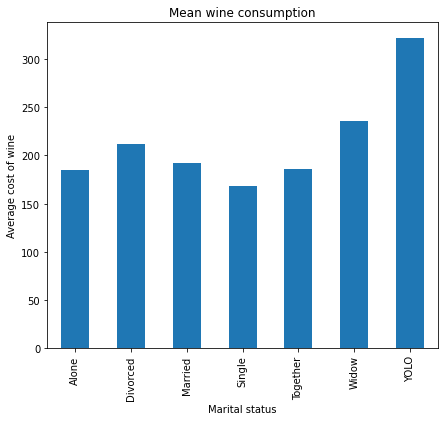

In [73]:
ms_mean = df.groupby(['Marital_Status'])['MntWines'].mean()
ms_mean.plot(kind="bar", title='Mean wine consumption', ylabel='Average cost of wine',
                                                xlabel='Marital status', figsize=(7, 6))
# Alone, Single и YOLO - одна и та же категория, таким образом, мы можем замтетить, что одинокие люди больше других потребляют алкоголь
# в среднем затраты на аклоголь у них сильно выше

<AxesSubplot:title={'center':'Average income by eduaction level'}, xlabel='Marital status', ylabel='Average income'>

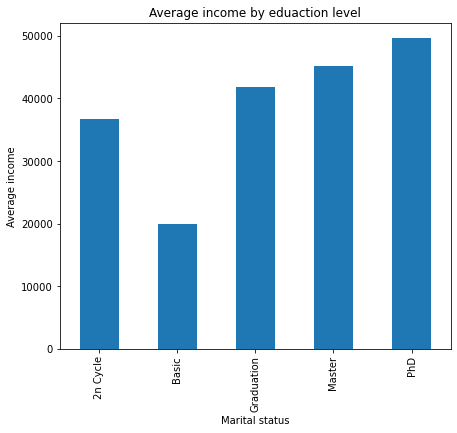

In [123]:
ms_mean = df.groupby(['Education'])['Income'].mean()
ms_mean.plot(kind="bar", title='Average income by eduaction level', ylabel='Average income',
             xlabel='Marital status', figsize=(7, 6))

# как мы можем заметить, чемы выше уровень образования, тем выше средний доход. Это достаточно легко понять, ведь зачастую более квалифицированные люди зарабатывают больше остальных

[(0.0, 8.0),
 (0.0, 8.0),

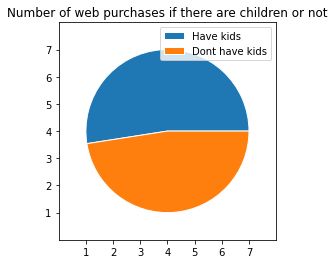

In [87]:
# https://matplotlib.org/stable/plot_types/stats/pie.html#sphx-glr-plot-types-stats-pie-py
number_of_purchases_kids = len( df[(df['Kidhome'] > 0) | (df['Teenhome'] > 0)][['NumWebPurchases']])
number_of_purchases_no_kids = len( df[(df['Kidhome'] == 0) | (df['Teenhome'] == 0)][['NumWebPurchases']])
fig, ax = plt.subplots()
ax.pie([number_of_purchases_kids, number_of_purchases_no_kids], radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
labels = ['Have kids', 'Dont have kids']
plt.legend(labels, loc="best")
plt.title("Number of web purchases if there are children or not")
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

# люди у которых есть дети в среднем делают немного больше заказов, однако это отклонение не столь значительно. Можно сделать предположение, что люди с детьми зачастую предпочитают делают больше онлайн закзов, что может быть связано с меньшим количеством времени

<AxesSubplot:title={'center':'Money spent on fruits depends on income'}, xlabel='Income', ylabel='Spent on fruits'>

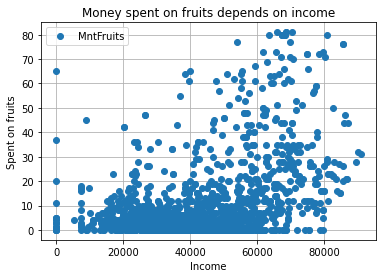

In [95]:
# https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py
df.plot(x='Income', y='MntFruits', ylabel='Spent on fruits', title='Money spent on fruits depends on income', style='o', grid=True)
# как мы можем заметить, больше всего на фрукты тратят люди с достаточно большим достатком, что можно объяснить повышенной заботой о здоровье
# и достаточно высокой ценой на фрукты

Text(0.5, 1.0, 'Amount of money spent on fish products')

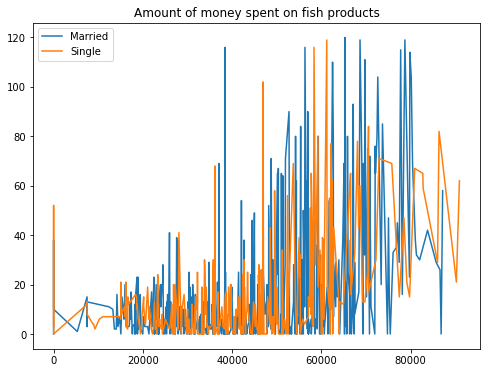

In [141]:
fig, ax = plt.subplots(figsize=(8,6))
for _, group in df[(df['Marital_Status'] == 'Married') | (df['Marital_Status'] == 'Single')].groupby('Marital_Status'):
    group = group.sort_values(by=['Income'])
    plt.plot(group['Income'], group['MntFishProducts'])

labels = ['Married', 'Single']
plt.legend(labels, loc="best")
plt.title("Amount of money spent on fish products")
# график хоть и получился не очень красивым, однако мы можем заметить, что замужние люди в среднем больше тратят на рыбные продукты. Аналогично,
# люди с низким доходом тратят в среднем меньше, так как рыбные продукты являются достаточно дорогой продукцией. Однако, выбросы присутствуют
# Эта закономерность перестает работать на определенном уровне дохода, можно сделать предположение, что такие люди не так часто покупают продукты, так как, вероятно, у них есть
# возможность не готовить себе еду самостоятельно

In [129]:
df['Education'].unique()

array(['Graduation', '2n Cycle', 'PhD', 'Master', 'Basic'], dtype=object)

Text(0.5, 1.0, 'Accepted last campaign by education level')

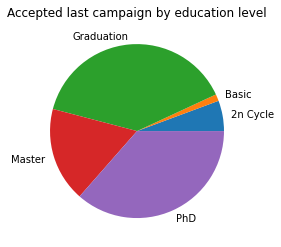

In [145]:
accepted = df[df['Response'] == 1][['Education']].copy()
accepted = accepted.groupby('Education').value_counts()
accepted.plot.pie(ylabel='')
plt.title("Accepted last campaign by education level")

# как можем заметить, больше всего откликались люди с образование phd и graduation, в связи с чем можно сделать вывод, что именно они являются целевой аудторией этой акции

Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

In [151]:
df.groupby(['Country']).describe()
# жители Мексики больше всех остальных потребляют все продукты (особенно выбиваются категории: мясо, вино и сладости) кроме фруктов, где они отстают достаточно сильно. Конечно, данных достаточно мало и мы можем
# и средний возраст покупателя около 60 лет. Результатом такого распределения может быть тот факт, что в Мексике фрукты локальные стоят дешевле и потому
# магазины не могут составить конкурценцию или, вероятно, общий уровень популярности "здорового образа жизни" достаточно низок

ID                                                              \
         count         mean          std     min      25%     50%      75%   
Country                                                                      
AUS      111.0  5656.027027  3143.323986   322.0  2794.00  5824.0  8178.00   
CA       172.0  5633.139535  3375.091324     1.0  2947.25  5260.0  8653.25   
GER       85.0  4949.576471  3324.300479    20.0  2115.00  4682.0  7532.00   
IND      111.0  5366.756757  3357.594819    73.0  2683.50  4877.0  7923.00   
ME         2.0  6121.500000  4527.604720  2920.0  4520.75  6121.5  7722.25   
SA       219.0  5549.228311  3175.362913    13.0  2702.00  5303.0  8160.50   
SP       764.0  5667.273560  3254.290077    22.0  2884.00  5551.5  8497.50   
US        72.0  6090.666667  3268.841432   143.0  2825.50  6380.5  8883.50   

                 Year_Birth               ...     AvgIncome           \
             max      count         mean  ...           75%      max   
Country                                   ...                          
AUS      11031.0      111.0  1967.792793  ...  18791.666667  75777.0   
CA       11187.0      172.0  1968.302326  ...  20198.166667  86037.0   
GER      11178.0       85.0  1968.705882  ...  21197.000000  81361.0   
IND      11133.0      111.0  1971.558559  ...  22128.166667  75777.0   
ME        9323.0        2.0  1962.000000  ...  23889.583333  26307.0   
SA       11092.0      219.0  1969.835616  ...  22516.750000  82800.0   
SP       11191.0      764.0  1969.365183  ...  21139.125000  90933.0   
US       10767.0       72.0  1969.000000  ...  25305.500000  90247.0   

        AvgProducts                                                         \
              count       mean        std        min        25%        50%   
Country                                                                      
AUS           111.0  28.431101  28.930851   2.666667  10.500000  20.400000   
CA            172.0  27.739454  23.877137   2.666667  10.750000  21.833333   
GER            85.0  31.405595  32.750664   4.333333  11.200000  21.500000   
IND           111.0  27.243494  21.172576   3.333333  10.775000  22.285714   
ME              2.0  75.205882  33.649964  51.411765  63.308824  75.205882   
SA            219.0  28.927691  26.590056   4.250000  11.000000  22.285714   
SP            764.0  29.663489  26.808280   3.000000  10.500000  22.154762   
US             72.0  35.346557  30.009437   6.333333  15.125000  28.555556   

                                
               75%         max  
Country                         
AUS      37.135714  184.000000  
CA       36.762868  139.600000  
GER      38.444444  229.333333  
IND      35.910256  110.555556  
ME       87.102941   99.000000  
SA       36.157143  156.625000  
SP       37.041667  210.625000  
US       42.372768  162.100000  

[8 rows x 208 columns]

<AxesSubplot:title={'center':'Mean wine consumption'}, xlabel='Marital status', ylabel='Average cost of wine'>

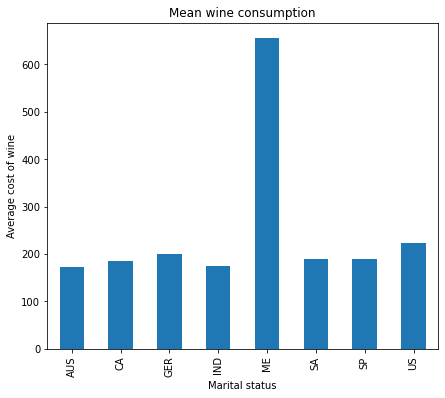

In [152]:
ms_mean = df.groupby(['Country'])['MntWines'].mean()
ms_mean.plot(kind="bar", title='Mean wine consumption by country', ylabel='Average cost of wine',
             xlabel='Country', figsize=(7, 6))

<AxesSubplot:title={'center':'Mean fish consumption'}, xlabel='Country', ylabel='Average cost of fish'>

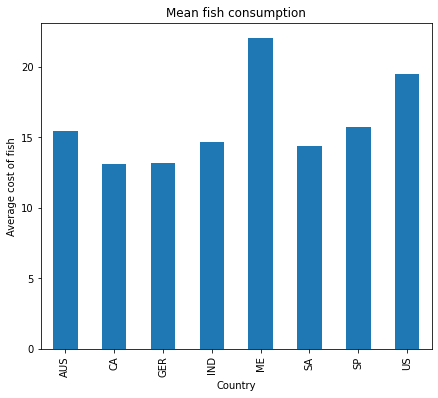

In [154]:
ms_mean = df.groupby(['Country'])['MntFishProducts'].mean()
ms_mean.plot(kind="bar", title='Mean fish consumption', ylabel='Average cost of fish',
             xlabel='Country', figsize=(7, 6))

<AxesSubplot:title={'center':'Mean meat consumption'}, xlabel='Country', ylabel='Average cost of fish'>

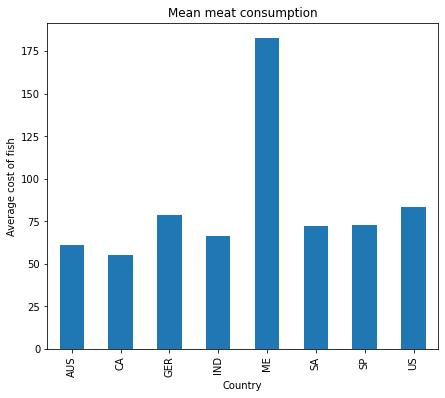

In [157]:
ms_mean = df.groupby(['Country'])['MntMeatProducts'].mean()
ms_mean.plot(kind="bar", title='Mean meat consumption', ylabel='Average cost of meat',
             xlabel='Country', figsize=(7, 6))

<AxesSubplot:title={'center':'Mean meat consumption'}, xlabel='Country', ylabel='Average cost of fish'>

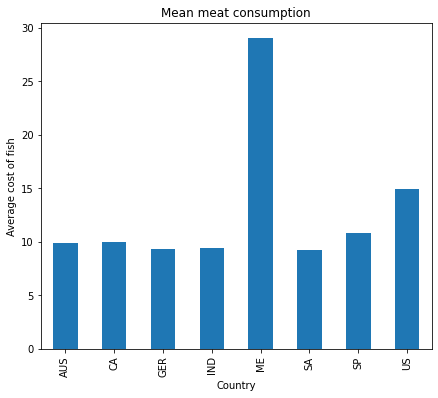

In [158]:
ms_mean = df.groupby(['Country'])['MntSweetProducts'].mean()
ms_mean.plot(kind="bar", title='Mean sweet products consumption', ylabel='Average cost of sweet products',
             xlabel='Country', figsize=(7, 6))

<AxesSubplot:title={'center':'Mean gold products consumption'}, xlabel='Country', ylabel='Average cost of gold products'>

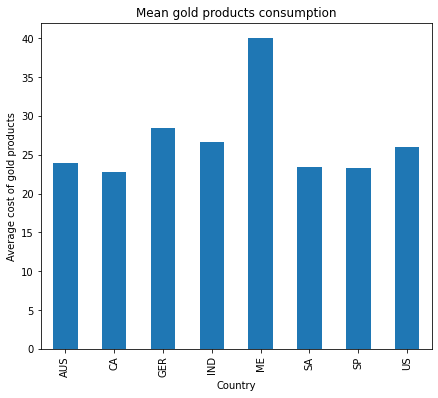

In [160]:
ms_mean = df.groupby(['Country'])['MntGoldProds'].mean()
ms_mean.plot(kind="bar", title='Mean gold products consumption', ylabel='Average cost of gold products',
             xlabel='Country', figsize=(7, 6))